In [78]:
import pandas as pd
file_path = '../Datasets/PTSD_data.csv'
data = pd.read_csv(file_path)
data

,sex,age,education,iq,specific.disorder,ab.a.delta.a.fp1,ab.a.delta.b.fp2,ab.a.delta.c.f7,ab.a.delta.d.f3,ab.a.delta.e.fz,...,coh.f.gamma.o.pz.p.p4,coh.f.gamma.o.pz.q.t6,coh.f.gamma.o.pz.r.o1,coh.f.gamma.o.pz.s.o2,coh.f.gamma.p.p4.q.t6,coh.f.gamma.p.p4.r.o1,coh.f.gamma.p.p4.s.o2,coh.f.gamma.q.t6.r.o1,coh.f.gamma.q.t6.s.o2,coh.f.gamma.r.o1.s.o2
0,0,36.62,12.0,99.0,1,17.603385,17.243334,11.729942,15.381709,18.307108,...,94.727123,73.994841,75.159075,72.479599,81.756815,74.578657,78.980627,60.508215,65.113378,69.238767
1,0,55.21,16.0,120.0,1,21.714048,19.579805,18.522271,26.820075,25.429025,...,83.821476,61.617403,63.964423,73.096645,74.161249,50.432291,77.440228,35.794362,70.592405,48.283439
2,0,26.93,16.0,116.0,1,13.371076,14.028142,16.901291,21.767857,18.227411,...,70.585726,63.864062,46.127953,65.675414,62.455949,33.114945,56.163998,37.477109,72.732968,46.665464
3,1,26.71,17.0,137.0,1,30.473244,13.954586,23.056715,26.177810,27.884679,...,87.768539,71.799769,65.845016,67.734909,78.328065,58.141474,68.113967,53.391012,71.111448,67.598506
4,0,23.45,12.0,89.0,1,18.488575,19.603144,9.899157,21.724115,32.700666,...,70.188502,27.698816,24.181746,34.445899,47.797466,20.737129,47.210870,11.104500,50.442443,36.952529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,29.04,16.0,114.0,0,22.737005,23.110192,20.655895,18.224802,19.315381,...,88.188438,48.337650,77.414168,76.804444,51.999675,76.470883,80.365068,48.841509,56.730760,82.017645
100,0,25.65,18.0,118.0,0,20.081892,17.928614,15.977752,18.119963,17.029861,...,99.447826,99.424714,44.181841,61.683927,99.513428,43.007308,62.525177,42.766646,62.843978,39.895496
101,0,29.86,20.0,113.0,0,46.306229,47.379694,48.808082,50.943346,43.768029,...,90.988675,82.588144,91.869140,88.146513,82.027254,87.799612,85.360432,84.867957,90.909785,90.730560
102,1,27.00,18.0,130.0,0,22.152399,22.698280,19.281922,28.462510,31.292110,...,58.751205,46.407702,55.207337,50.262542,56.166800,37.817569,55.401371,31.634053,67.817508,43.937626


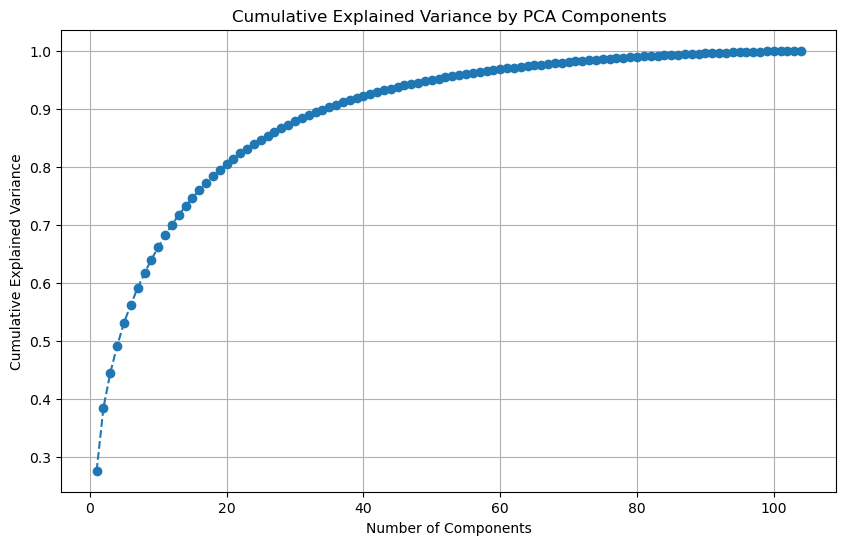

102

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separating the features from the target variable if present
# Assuming 'specific.disorder' is the target column to exclude for PCA
features = data.drop(columns=['specific.disorder'], errors='ignore')

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Display the top components explaining at least 95% variance
cumulative_variance_95 = (explained_variance.cumsum() <= 1.0).sum()
cumulative_variance_95


In [95]:
explained_variance.size

104

In [80]:
# Reducing the dataset to 50 principal components
pca_50 = PCA(n_components=50)
reduced_data = pca_50.fit_transform(scaled_features)

reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(50)])
reduced_df.to_csv('../Datasets/PTSD_data_pca.csv', index=False)

In [96]:
reduced_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,12.779052,19.797372,-6.378681,1.459691,1.563641,4.488710,0.912103,-1.362111,-4.469459,-0.586051,...,-2.263593,0.104046,2.142179,-2.408506,-0.379636,-1.634030,0.585561,-3.193672,-1.085583,-0.723024
1,18.994984,13.625070,-10.487030,2.215184,-2.726964,-9.694998,-2.540181,-4.173138,-0.694174,2.514862,...,2.561103,-1.916280,0.625039,-0.633628,1.442974,2.645878,1.427164,-1.291144,-2.167169,-3.267802
2,-1.265459,-2.931628,-3.856122,-4.772294,14.944934,7.590567,8.447872,0.387912,-3.065523,-1.206091,...,0.890603,-0.202464,-2.188712,-0.634130,-0.341401,0.614670,1.080089,-1.861718,-0.833232,0.444490
3,-2.633879,8.160724,1.900518,-1.091241,-4.558809,-1.762043,-2.729850,-0.136052,-8.968624,-5.774950,...,-2.489128,0.881390,0.669090,-1.382151,-3.397332,-1.546738,-1.236094,-1.655167,-1.081324,-0.211372
4,-14.438759,-4.124771,2.960252,-5.971281,9.348285,1.261828,-1.193961,-4.839534,-3.704655,-0.949625,...,-2.060580,1.395264,2.192643,3.283480,0.045911,-0.977789,3.999311,1.997853,-0.775836,-0.828580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,8.972589,-5.569193,19.906878,8.720557,-1.585094,12.315786,-1.603583,-0.997871,0.535145,-4.035027,...,3.899605,3.632753,2.241430,1.128322,-2.331561,2.453215,-1.644942,-0.065595,-0.666358,1.551978
100,-0.470270,-13.617634,-12.545063,-10.707556,-3.264526,2.434853,9.461754,-1.591993,0.195816,-7.338899,...,-0.541946,-2.317589,1.056063,0.597380,0.062400,1.285488,0.939846,1.681483,1.216392,1.296005
101,33.304541,22.603046,20.474804,-2.996742,15.976027,-5.911600,-0.096176,-3.123504,-6.573080,1.370836,...,-2.002294,-2.816253,4.227276,-1.974480,0.670543,-1.795434,1.680940,0.473578,0.818230,-0.245796
102,7.932722,-22.976186,2.869904,-8.614220,-4.844036,-4.804950,0.200342,-4.474181,3.451303,-1.571567,...,0.008643,-1.193754,-2.062521,0.538747,1.286093,-2.564465,-1.653700,0.044629,0.699440,-0.825018


In [81]:
# Extracting the PCA loading matrix
loading_matrix = pca_50.components_

# Creating a DataFrame for the loading matrix
loading_df = pd.DataFrame(loading_matrix.T, 
                          columns=[f'PC{i+1}' for i in range(50)],
                          index=features.columns)

# Display the contributions of original features to the top 5 principal components
top_contributors = loading_df.iloc[:, :5].abs().sort_values(by='PC1', ascending=False)
top_contributors.head(10)


,PC1,PC2,PC3,PC4,PC5
coh.e.highbeta.g.f8.o.pz,0.046780,0.030130,0.014013,0.016657,0.001738
coh.e.highbeta.h.t3.q.t6,0.046374,0.033115,0.011130,0.004165,0.001817
coh.f.gamma.g.f8.o.pz,0.046333,0.028459,0.014347,0.012722,0.008013
coh.e.highbeta.g.f8.n.p3,0.046175,0.039079,0.002013,0.018359,0.003575
coh.f.gamma.h.t3.q.t6,0.046052,0.031055,0.007977,0.000501,0.007353
coh.f.gamma.f.f4.o.pz,0.045957,0.035542,0.000213,0.004960,0.001330
coh.e.highbeta.f.f4.o.pz,0.045859,0.034111,0.002024,0.008043,0.002817
coh.f.gamma.g.f8.n.p3,0.045581,0.037895,0.003179,0.012592,0.002760
coh.f.gamma.i.c3.q.t6,0.045398,0.031716,0.008183,0.009310,0.003443
coh.e.highbeta.h.t3.k.c4,0.045355,0.029688,0.007840,0.008623,0.006375


In [82]:
# Identify frequency bands based on feature names
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma', 'highbeta']

# Aggregating features into frequency bands
band_aggregates = {}
for band in bands:
    band_features = [col for col in features.columns if band in col.lower()]
    if band_features:
        band_data = features[band_features]
        band_aggregates[f'{band}_mean'] = band_data.mean(axis=1)
        band_aggregates[f'{band}_std'] = band_data.std(axis=1)

# Create a DataFrame for the aggregated features
aggregated_features_df = pd.DataFrame(band_aggregates)

# Display the first few rows of the aggregated features
aggregated_features_df.head()


,delta_mean,delta_std,theta_mean,theta_std,alpha_mean,alpha_std,beta_mean,beta_std,gamma_mean,gamma_std,highbeta_mean,highbeta_std
0,23.298492,23.710194,33.172338,28.122099,34.903653,29.282787,44.915666,24.131851,59.059986,25.094651,44.379514,24.663964
1,34.724713,23.748095,32.561620,25.587523,40.262575,29.753055,49.345920,24.760936,59.738209,23.886942,56.774423,23.396471
2,42.980692,21.225260,35.980112,23.427117,36.018281,29.413302,34.478205,25.682415,38.081604,21.927510,33.373840,23.058997
3,32.252248,23.895032,30.867531,25.278802,36.625525,27.162056,33.403024,22.249088,40.547496,25.645156,36.523489,23.038450
4,29.157718,18.986630,41.258661,24.517137,31.864220,25.809164,26.768415,22.208132,26.744541,21.397895,25.417278,20.804312


In [83]:
y

0      1
1      1
2      1
3      1
4      1
      ..
99     0
100    0
101    0
102    0
103    0
Name: specific.disorder, Length: 104, dtype: int64

In [84]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Prepare the dataset: Aggregated features and target variable
target = data['specific.disorder']
X = aggregated_features_df
y = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = CatBoostClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
accuracy = f1_score(y_test, y_pred)

# Display classification report
classification_report_result = classification_report(y_test, y_pred)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(accuracy)
print(feature_importance)
print(classification_report_result) 

Learning rate set to 0.00335
0:	learn: 0.6917015	total: 8.25ms	remaining: 8.24s
1:	learn: 0.6896239	total: 9.22ms	remaining: 4.6s
2:	learn: 0.6878546	total: 10.7ms	remaining: 3.55s
3:	learn: 0.6854371	total: 11.6ms	remaining: 2.88s
4:	learn: 0.6833511	total: 12.4ms	remaining: 2.47s
5:	learn: 0.6820592	total: 13.1ms	remaining: 2.17s
6:	learn: 0.6802270	total: 13.8ms	remaining: 1.95s
7:	learn: 0.6788755	total: 14.2ms	remaining: 1.76s
8:	learn: 0.6773394	total: 14.6ms	remaining: 1.61s
9:	learn: 0.6751273	total: 15.3ms	remaining: 1.51s
10:	learn: 0.6738758	total: 16.3ms	remaining: 1.47s
11:	learn: 0.6718620	total: 17.4ms	remaining: 1.43s
12:	learn: 0.6702906	total: 19.3ms	remaining: 1.47s
13:	learn: 0.6687683	total: 23.4ms	remaining: 1.65s
14:	learn: 0.6669721	total: 25.3ms	remaining: 1.66s
15:	learn: 0.6657175	total: 26.3ms	remaining: 1.62s
16:	learn: 0.6644459	total: 30ms	remaining: 1.73s
17:	learn: 0.6629600	total: 30.7ms	remaining: 1.68s
18:	learn: 0.6608970	total: 31.5ms	remaining: 1.

In [85]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [1, 3, 6, None]
    }

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=CatBoostClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Perform the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the optimized model on the test set
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
optimized_accuracy = f1_score(y_test, y_pred_optimized)
optimized_classification_report = classification_report(y_test, y_pred_optimized)

print(best_params, best_score, optimized_accuracy, optimized_classification_report)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Learning rate set to 0.02523
Learning rate set to 0.009213
Learning rate set to 0.025043
Learning rate set to 0.02523
Learning rate set to 0.009145
Learning rate set to 0.025043
Learning rate set to 0.009145
Learning rate set to 0.02523
0:	learn: 0.6893217	total: 51.9ms	remaining: 5.13s
1:	learn: 0.6861748	total: 51.9ms	remaining: 2.54s
0:	learn: 0.6909477	total: 51.4ms	remaining: 5.09s
2:	learn: 0.6836683	total: 52ms	remaining: 1.68s
3:	learn: 0.6796216	total: 52ms	remaining: 1.25s
4:	learn: 0.6763034	total: 52ms	remaining: 989ms
5:	learn: 0.6724328	total: 52.1ms	remaining: 816ms
1:	learn: 0.6857871	total: 51.5ms	remaining: 2.52s
2:	learn: 0.6816711	total: 51.6ms	remaining: 1.67s
6:	learn: 0.6695965	total: 52.1ms	remaining: 692ms
3:	learn: 0.6776416	total: 51.8ms	remaining: 1.24s
4:	learn: 0.6754351	total: 51.8ms	remaining: 985ms
5:	learn: 0.6719341	total: 51.9ms	remaining: 812ms
6:	learn: 0.6683150	total: 51.9ms	remaining: 689ms
7:	learn: 0.6674563	total: 51.9ms	remaining: 597ms
7:	l

In [86]:
# Train the baseline Random Forest model
baseline_rf = CatBoostClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)

# Evaluate the baseline model
y_pred_baseline = baseline_rf.predict(X_test)
baseline_accuracy = f1_score(y_test, y_pred_baseline)
baseline_classification_report = classification_report(y_test, y_pred_baseline)

# Evaluate the hyper-tuned model (if available)
try:
    y_pred_tuned = grid_search.best_estimator_.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
    tuned_classification_report = classification_report(y_test, y_pred_tuned)
except:
    tuned_accuracy = None
    tuned_classification_report = "Tuned model not available or not completed."

print(baseline_accuracy, baseline_classification_report)


Learning rate set to 0.00335
0:	learn: 0.6917015	total: 4.02ms	remaining: 4.02s
1:	learn: 0.6896239	total: 11ms	remaining: 5.48s
2:	learn: 0.6878546	total: 18.4ms	remaining: 6.11s
3:	learn: 0.6854371	total: 25.3ms	remaining: 6.3s
4:	learn: 0.6833511	total: 29.5ms	remaining: 5.88s
5:	learn: 0.6820592	total: 31.9ms	remaining: 5.29s
6:	learn: 0.6802270	total: 32.9ms	remaining: 4.67s
7:	learn: 0.6788755	total: 33.4ms	remaining: 4.14s
8:	learn: 0.6773394	total: 33.9ms	remaining: 3.73s
9:	learn: 0.6751273	total: 34.6ms	remaining: 3.42s
10:	learn: 0.6738758	total: 84ms	remaining: 7.55s
11:	learn: 0.6718620	total: 84.9ms	remaining: 6.99s
12:	learn: 0.6702906	total: 86.2ms	remaining: 6.54s
13:	learn: 0.6687683	total: 88.3ms	remaining: 6.22s
14:	learn: 0.6669721	total: 110ms	remaining: 7.22s
15:	learn: 0.6657175	total: 111ms	remaining: 6.82s
16:	learn: 0.6644459	total: 112ms	remaining: 6.47s
17:	learn: 0.6629600	total: 113ms	remaining: 6.18s
18:	learn: 0.6608970	total: 114ms	remaining: 5.89s
19:

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.71      0.56      0.63        18

    accuracy                           0.62        32
   macro avg       0.63      0.63      0.63        32
weighted avg       0.64      0.62      0.63        32

AUC-ROC: 0.73


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize Random Forest and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC (Random Forest): {roc_auc_score(y_test, y_pred_proba_rf):.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.79      0.83      0.81        18

    accuracy                           0.78        32
   macro avg       0.78      0.77      0.78        32
weighted avg       0.78      0.78      0.78        32

AUC-ROC (Random Forest): 0.79


In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.79
Recall: 0.83
F1-Score: 0.81


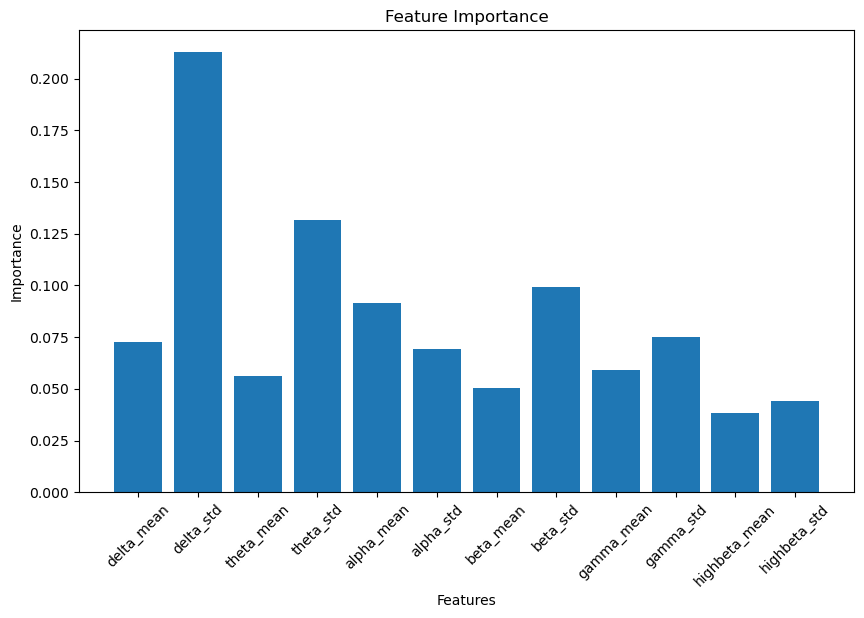

In [90]:
import matplotlib.pyplot as plt

# Extract feature importance from the Random Forest model
feature_importances = best_rf.feature_importances_

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [91]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning
param_grid =     {
        'n_estimators': [100, 300, 500],
        'max_depth': [1, 3, 6, None]
    }

# Initialize Random Forest and GridSearchCV
rf = CatBoostClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC (Random Forest): {roc_auc_score(y_test, y_pred_proba_rf):.2f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Learning rate set to 0.025043
0:	learn: 0.6909477	total: 204us	remaining: 20.3ms
1:	learn: 0.6857871	total: 1.77ms	remaining: 86.8ms
2:	learn: 0.6816711	total: 1.91ms	remaining: 61.6ms
3:	learn: 0.6776416	total: 2.05ms	remaining: 49.1ms
4:	learn: 0.6754351	total: 2.09ms	remaining: 39.8ms
5:	learn: 0.6719341	total: 2.13ms	remaining: 33.5ms
6:	learn: 0.6683150	total: 4.19ms	remaining: 55.6ms
7:	learn: 0.6674563	total: 5.34ms	remaining: 61.4ms
8:	learn: 0.6639833	total: 5.8ms	remaining: 58.7ms
9:	learn: 0.6601498	total: 6.01ms	remaining: 54.1ms
10:	learn: 0.6563855	total: 6.06ms	remaining: 49ms
11:	learn: 0.6533140	total: 6.1ms	remaining: 44.7ms
12:	learn: 0.6527907	total: 6.14ms	remaining: 41.1ms
13:	learn: 0.6492090	total: 6.17ms	remaining: 37.9ms
14:	learn: 0.6470348	total: 6.21ms	remaining: 35.2ms
15:	learn: 0.6440004	total: 6.24ms	remaining: 32.8ms
16:	learn: 0.6429250	total: 6.29ms	remaining: 30.7ms
17:	learn: 0.6390841	to

In [92]:
# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.75
Recall: 0.67
F1-Score: 0.71


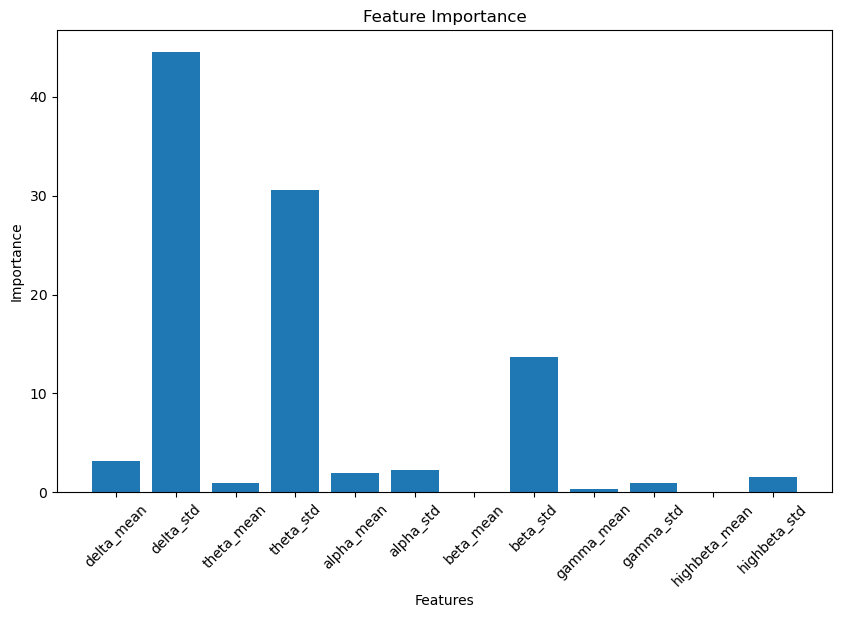

In [93]:
import matplotlib.pyplot as plt

# Extract feature importance from the Random Forest model
feature_importances = best_rf.feature_importances_

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
